In [1]:
using SnpArrays
using Statistics
using RCall
R"library(corrplot)"
R"library(RColorBrewer)"

┌ Warning: RCall.jl: corrplot 0.84 loaded
└ @ RCall /Users/biona001/.julia/packages/RCall/ffM0W/src/io.jl:113


RObject{StrSxp}
[1] "RColorBrewer" "corrplot"     "stats"        "graphics"     "grDevices"   
[6] "utils"        "datasets"     "methods"      "base"        


In [5]:
x = SnpArray("kevin_imputed_filtered_HDL.bed")
M = zeros(4907, 9)
snps_positions = [119288; 119293; 119294; 213243; 265116; 275336; 275338; 276491; 310746]
for i in 1:9
    cur_snps = snps_positions[i]
    copyto!(@view(M[:, i]), @view(x[:, cur_snps]), center=true, scale=true)
end
M

4907×9 Array{Float64,2}:
 0.282273   0.893534  0.279135   1.20196  …   0.623696  -1.73897    0.300514
 0.282273  -0.672384  0.279135   1.20196      0.623696  -1.73897    0.300514
 0.282273  -0.672384  0.279135  -1.66394      0.623696   0.502461   0.300514
 0.282273  -0.672384  0.279135   1.20196      0.623696   0.502461   0.300514
 0.282273  -0.672384  0.279135  -0.23099     -1.2915    -1.73897    0.300514
 0.282273   0.893534  0.279135  -0.23099  …   0.623696   0.502461   0.300514
 0.282273  -0.672384  0.279135   1.20196     -1.2915     0.502461   0.300514
 0.282273  -0.672384  0.279135   1.20196      0.623696   0.502461   0.300514
 0.282273  -0.672384  0.279135  -0.23099     -1.2915     0.502461   0.300514
 0.282273  -0.672384  0.279135  -1.66394      0.623696   0.502461   0.300514
 0.282273   0.893534  0.279135   1.20196  …   0.623696  -3.98041    0.300514
 0.282273  -0.672384  0.279135  -1.66394     -1.2915     0.502461   0.300514
 0.282273  -0.672384  0.279135  -1.66394     -1.291

In [8]:
corM = cor(M)

9×9 Array{Float64,2}:
  1.0          0.618396     0.983722    …  -0.00541423   -0.0192122  
  0.618396     1.0          0.619867        0.00673418   -0.0179319  
  0.983722     0.619867     1.0            -0.00249751   -0.0176979  
 -0.00250079   0.01026     -0.00390766      0.0142781    -0.00862255 
 -0.0060473   -0.01024     -0.00280101     -0.012483     -0.0215108  
 -0.00522789   0.00380809  -0.00720823  …   0.000847227   0.000107767
 -0.0120513   -0.0149149   -0.0128018      -0.0490309     0.0216295  
 -0.00541423   0.00673418  -0.00249751      1.0          -0.0157563  
 -0.0192122   -0.0179319   -0.0176979      -0.0157563     1.0        

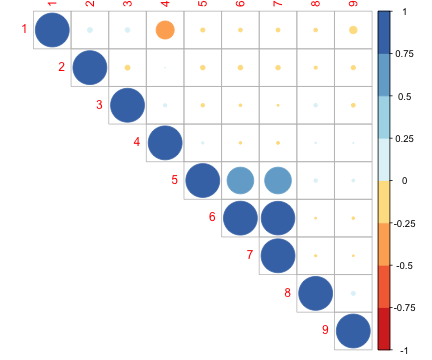

RObject{RealSxp}
            1             2            3             4            5
1  1.00000000  0.0216295114  0.018397880 -0.2863020121 -0.014914944
2  0.02162951  1.0000000000 -0.021510795  0.0001077674 -0.017931876
3  0.01839788 -0.0215107947  1.000000000  0.0086117575 -0.010239995
4 -0.28630201  0.0001077674  0.008611757  1.0000000000  0.003808094
5 -0.01491494 -0.0179318763 -0.010239995  0.0038080942  1.000000000
6 -0.01205127 -0.0192122171 -0.006047300 -0.0052278913  0.618396100
7 -0.01280182 -0.0176979483 -0.002801010 -0.0072082286  0.619867082
8 -0.01130937 -0.0086225473  0.010718291  0.0015440571  0.010259957
9 -0.04903094 -0.0157563419 -0.012483047  0.0008472274  0.006734184
             6            7            8             9
1 -0.012051265 -0.012801820 -0.011309370 -0.0490309422
2 -0.019212217 -0.017697948 -0.008622547 -0.0157563419
3 -0.006047300 -0.002801010  0.010718291 -0.0124830466
4 -0.005227891 -0.007208229  0.001544057  0.0008472274
5  0.618396100  0.619867082 

In [10]:
@rput corM
R"corrplot(corM, type='upper', order='hclust',col=brewer.pal(n=8, name='RdYlBu'))"